# CMPS 320
## Lab 8: Decision Trees

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and visualizing a decision Tree

In this Lab we will be using the iris dataset. This is a famous dataset that contains the sepal and petal length and width (all in cm) of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica.

In [2]:
# The following code trains a DecisionTreeClassifier on the iris dataset

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
Data = iris.data # Iris data set
X = iris.data[:, 2:] # select petal length and width
y = iris.target # class of iris plant

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

You can visualize the trained Decision Tree by first using the export_graphviz() method to output a graph definition file called iris_tree.dot:

In [4]:
# pip install graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

#### Decision Tree decision boundaries

Saving figure decision_tree_decision_boundaries_plot


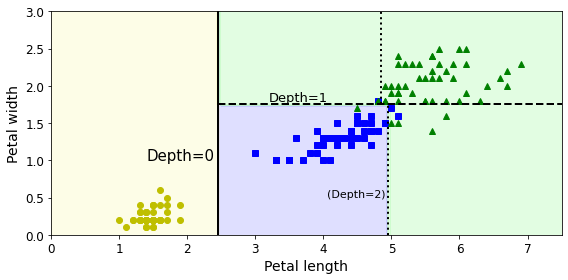

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

The Figure above shows this Decision Tree’s decision boundaries. 

The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm.

Since the lefthand area is pure (only Iris setosa), it cannot be split any further.

The righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). 

Since max_depth was set to 2, the Decision Tree stops right there. 

If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines).

# Predicting classes and class probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class k

For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide:

In [6]:
# Predicting probabilities
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

The Decision Tree should output the following probabilities: 
0% for Iris setosa (0/54), 
90.7% for Iris versicolor (49/54), and 
9.3% for Iris virginica (5/54).

If you ask it to predict the class, it should output Iris versicolor (class 1) because it has the highest probability:

In [7]:
# Predicting classes
tree_clf.predict([[5, 1.5]])

array([2])

Example: Suppose you have found a flower whose petals are 6 cm long and 1.5 cm wide:

In [8]:
# Predicting probabilities
tree_clf.predict_proba([[6, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [9]:
# Predicting classes
tree_clf.predict([[6, 1.5]])

array([2])

**Note:** Decision Trees are also capable of performing regression tasks. We can build a regression tree using Scikit-Learn’s **DecisionTreeRegressor** class,